In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
from skimage import io

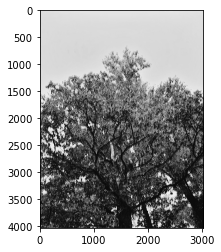

In [13]:
A = io.imread('image.jpg')
X = color.rgb2gray(A).astype(float)
nx, ny = X.shape

fig, ax = plt.subplots()
#ax.imshow(X, extent=[0, 1, 0, 1])
ax.imshow(X,cmap='gray');

In [14]:
# In the formal definition of the SVD, the shape of s should be (4, 2). However NumPy's routine returns an array of singular values of shape (2,). Furthermore, np.diag() doesn't know anything about how big s "should" be in the full decomposition. It just takes an array of shape (n,) and returns a 2D array of shape (n, n). So your inner product ends up with shapes (4, 4) * (2, 2) * (2, 2), which of course fails because sizes of the first product don't make sense.To fix this, just construct an array of the correct size for s:

In [15]:
Uhat, Shat, Vhat = np.linalg.svd(X, full_matrices=False) #economy SVD
true_Shat = np.zeros((Uhat.shape[1], Vhat.shape[0]))
true_Shat[:Shat.size, :Shat.size] = np.diag(Shat)
np.allclose(Uhat.dot(true_Shat).dot(Vhat), X)

True

In [16]:
print(Uhat.shape)
print(true_Shat.shape)
print(Vhat.shape)
print(np.transpose(Vhat).shape)

(4031, 3023)
(3023, 3023)
(3023, 3023)
(3023, 3023)


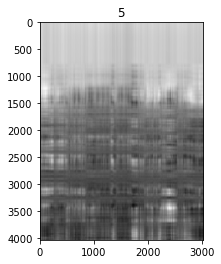

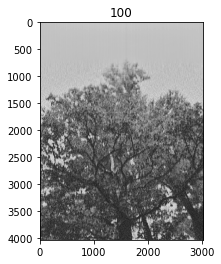

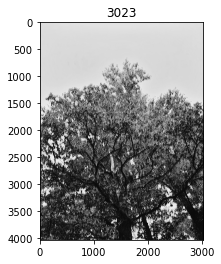

In [17]:
rvals = [5,100,3023]
for r in rvals:
    Xapprox = Uhat[:, 0:r].dot(true_Shat[0:r, 0:r]).dot(Vhat[0:r,:]) #transpose zaten burada edilmiş gibi
    fig, ax = plt.subplots()
    ax.imshow(Xapprox, cmap='gray');
    ax.set_title(str(r))

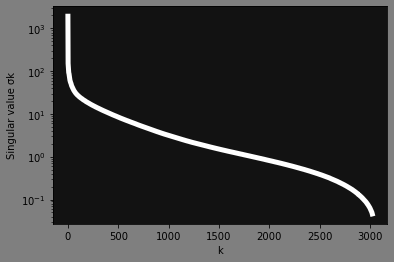

In [41]:
fig, ax = plt.subplots();
fig.set_facecolor('#7F7F7F')
ax.set_facecolor('#121212')
plt.semilogy(np.diagonal(true_Shat), color = 'white', linewidth = 5);
plt.xlabel("k");
plt.ylabel("Singular value σk");
plt.show()

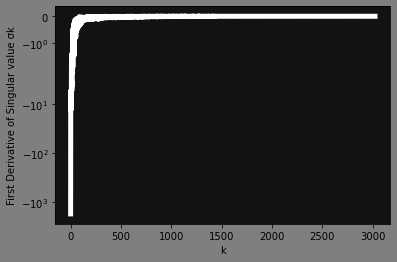

In [62]:
fig, ax = plt.subplots();
fig.set_facecolor('#7F7F7F')
ax.set_facecolor('#121212')
plt.yscale('symlog')
sv = np.diagonal(true_Shat);
sv1d = np.diff(sv, n=1);
plt.plot(sv1d, color = 'white', linewidth = 5);
plt.xlabel("k");
plt.ylabel("First Derivative of Singular value σk");
plt.show()

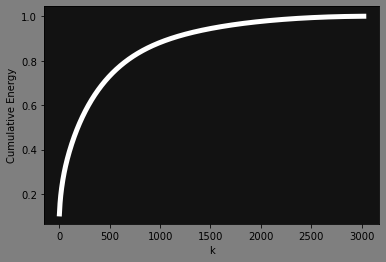

In [19]:
fig, ax = plt.subplots();
fig.set_facecolor('#7F7F7F')
ax.set_facecolor('#121212')
f = np.cumsum(np.diagonal(true_Shat)) / np.sum(true_Shat) # veya np.trace(true_Shat)
plt.plot(f, color = 'white', linewidth = 5);
plt.xlabel("k");
plt.ylabel("Cumulative Energy");
plt.show()

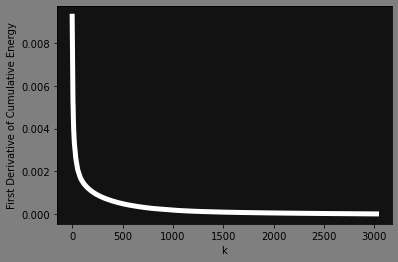

In [57]:
fig, ax = plt.subplots();
fig.set_facecolor('#7F7F7F')
ax.set_facecolor('#121212')
#f1d = np.gradient(f, 1)
f1d = np.diff(f, n=1)
plt.plot(f1d, color = 'white', linewidth = 5);
plt.xlabel("k");
plt.ylabel("First Derivative of Cumulative Energy");
plt.show()